In [1]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
%matplotlib inline

In [2]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'vanilla_simclr_temperature_0.7_bs_1024'
    dataset ='cifar10'
    fet = '_mean'
    fet2 = 'mean'

In [3]:
ood_dataset=['svhn','lsun_fix','imagenet_fix','lsun_resize','imagenet_resize'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [4]:
ind_dataset='cifar10'
experiment = opt.backbone_name
ae_type = 'DAE'
prefix = 'confidence' #confidence

layer_num=12
epoch=500
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet))))

# ind_MD = np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_in_{}_original_single.npy'.format(ind_dataset)))[:,:-1]
# ood_MD=[]
# for j in range(len(ood_dataset)):
#     ood_MD.append(np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_out_{}_original_single.npy'.format(ood_dataset[j])))[:,:-1])

In [5]:
train_ind_feature=dict()
test_ind_feature=dict()
test_ood_feature=dict()
num_ood=dict()

for i in range(layer_num):
    test_ood_feature[i]=[]
    num_ood[i]=[]
    train_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_train_ind.npy'))
    test_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_test_ind.npy'))
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_feature[i].append(np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+out_dataset[j]+'_'+opt.fet2+'_test_ood.npy')))
        num_ood[i].append(test_ood_feature[i][j].shape[0])
train_data_ind = train_ind_feature
test_data_ind = test_ind_feature
test_data_ood = test_ood_feature
for i in range(layer_num):
    print(train_data_ind[i].shape)

5
5
5
5
5
5
5
5
5
5
5
5
(50000, 64)
(50000, 64)
(50000, 64)
(50000, 128)
(50000, 128)
(50000, 256)
(50000, 256)
(50000, 512)
(50000, 512)
(50000, 512)
(50000, 2048)
(50000, 128)


In [23]:
train_ind_norm=dict()
test_ind_norm=dict()
test_ood_norm=dict()

for i in range(layer_num):
    layer=i
#     layer=layer_num-1
    test_ood_norm[i]=[]
    num_ood[i]=[]
    train_ind_norm[i]=np.linalg.norm(train_ind_feature[layer],axis=1)
    test_ind_norm[i]=np.linalg.norm(test_ind_feature[layer],axis=1)
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_norm[i].append(np.linalg.norm(test_ood_feature[layer][j],axis=1))


# norm_train_ind = train_ind_feature[13].norm(axis=1)

5
5
5
5
5
5
5
5
5
5
5
5


{'TMP': {'TNR': 0.42052089735709897, 'AUROC': 0.7940138560233558, 'DTACC': 0.7354026121696373, 'AUIN': 0.520914318888301, 'AUOUT': 0.9143325582978009}}

{'TMP': {'TNR': 0.8708128457283344, 'AUROC': 0.9728822564535956, 'DTACC': 0.9180799631223111, 'AUIN': 0.9389674400906687, 'AUOUT': 0.9884289546731878}}

{'TMP': {'TNR': 0.8089274738783037, 'AUROC': 0.9621271127842655, 'DTACC': 0.9029547019053473, 'AUIN': 0.9218067665402103, 'AUOUT': 0.9826119196438247}}

{'TMP': {'TNR': 0.9364244007375537, 'AUROC': 0.9840760026121697, 'DTACC': 0.9432966502765826, 'AUIN': 0.9536620433612226, 'AUOUT': 0.9940272924217436}}

{'TMP': {'TNR': 0.9552858020897357, 'AUROC': 0.9855781576521205, 'DTACC': 0.9581451137062078, 'AUIN': 0.9413999112976937, 'AUOUT': 0.9951414283399832}}

{'TMP': {'TNR': 0.8777274124154886, 'AUROC': 0.9568504110325753, 'DTACC': 0.9143819913952059, 'AUIN': 0.8362500508619745, 'AUOUT': 0.9854063254946811}}

{'TMP': {'TNR': 0.10387215734480637, 'AUROC': 0.6645506338352797, 'DTACC': 0.62591

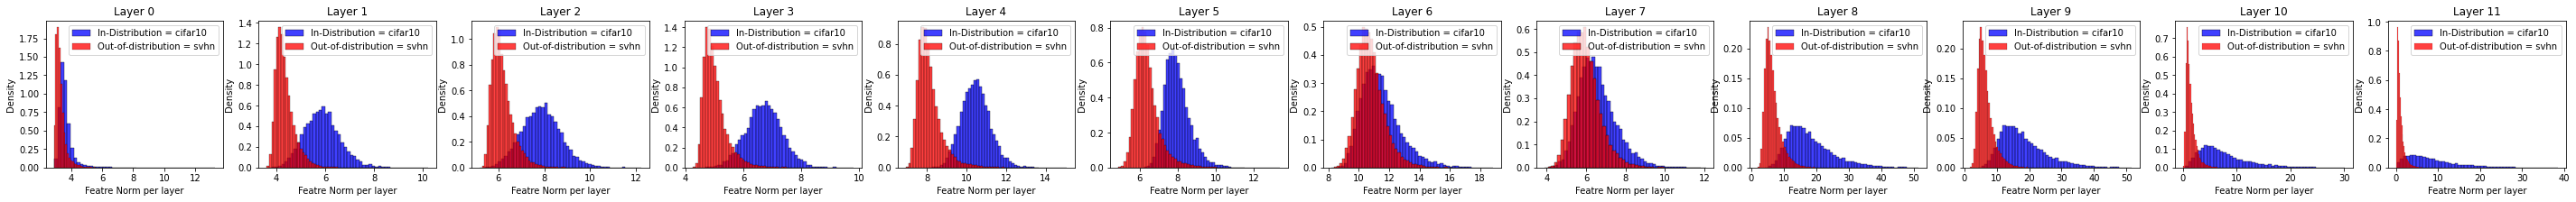

In [24]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(test_ind_norm[layer],test_ood_norm[layer][ood_index])
    print(results[layer])
    print('')
    sns.histplot(ax=axs[layer],data=test_ind_norm[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=test_ood_norm[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Featre Norm per layer')

In [25]:
# from sklearn.preprocessing import StandardScaler
# ind_norm_scaled=[]
# train_ind_norm_scaled=[]
# ood_norm_scaled=dict()
# for j in range(len(ood_dataset)):
#     ood_norm_scaled[j]=[]

# for i in range(layer_num):
#     scaler=StandardScaler()
#     scaler.fit(train_ind_norm[i].reshape(-1,1))
#     train_ind_norm_scaled.append(scaler.transform(train_ind_norm[i].reshape(-1,1)).reshape(-1))
#     ind_norm_scaled.append(scaler.transform(test_ind_norm[i].reshape(-1,1)).reshape(-1))
#     for j in range(len(ood_dataset)):
#         ood_norm_scaled[j].append(scaler.transform(test_ood_norm[i][j].reshape(-1,1)).reshape(-1))

In [26]:
# ind_norm_scaled_max=np.min(ind_norm_scaled,0)
# train_ind_norm_scaled_max = np.min(train_ind_norm_scaled,0)
# ood_norm_scaled_max=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max.append(np.min(ood_norm_scaled[j],0))

In [27]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max,color='blue')
# sns.histplot(ood_norm_scaled_max[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm')
# plt.xlabel('Feature Norm')

In [28]:
# ind_norm_scaled_max_exp=np.exp(ind_norm_scaled_max)
# train_ind_norm_scaled_max_exp= np.exp(train_ind_norm_scaled_max)
# ood_norm_scaled_max_exp=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max_exp.append(np.exp(ood_norm_scaled_max[j]))

In [29]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max_exp,color='blue')
# sns.histplot(ood_norm_scaled_max_exp[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

In [30]:
# ind_revised=[]
# ind_train_revised=[]
# ood_revised=dict()

# for i in range(layer_num):
#     ood_revised[i]=[]
#     ind_revised.append(ind[i]/ind_norm_scaled_max_exp)
#     ind_train_revised.append(ind_train[i]/train_ind_norm_scaled_max_exp)
#     for j in range(len(ood_dataset)):
#         ood_revised[i].append(ood[i][j]/ood_norm_scaled_max_exp[j])

In [35]:
ind_revised=[]
ind_train_revised=[]
ood_revised=dict()

for i in range(layer_num):
    ood_revised[i]=[]
    ind_revised.append(ind[i]/(test_ind_norm[i]))
    ind_train_revised.append(ind_train[i]/(train_ind_norm[i]))
    for j in range(len(ood_dataset)):
        ood_revised[i].append(ood[i][j]/(test_ood_norm[i][j]))

In [36]:
# layer=2
# sns.histplot(test_ind_norm[layer],color='blue')
# sns.histplot(test_ood_norm[layer][0],color='red')
# plt.legend(['CIFAR10','SVHN'])
# plt.title('Extracted from Layer 2, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

{'TMP': {'TNR': 0.020513214505224364, 'AUROC': 0.5069278695451752, 'DTACC': 0.5538640442532269, 'AUIN': 0.35923321964098165, 'AUOUT': 0.6958440478346796}}

{'TMP': {'TNR': 0.13414259373079285, 'AUROC': 0.7672330362630608, 'DTACC': 0.7162889366933006, 'AUIN': 0.6621270225533301, 'AUOUT': 0.8546222506091399}}

{'TMP': {'TNR': 0.3133835279655808, 'AUROC': 0.8501791525814382, 'DTACC': 0.781998832206515, 'AUIN': 0.7421820435923403, 'AUOUT': 0.9115380730731885}}

{'TMP': {'TNR': 0.6923017824216349, 'AUROC': 0.9426164758758452, 'DTACC': 0.8747420098340504, 'AUIN': 0.8968769702847823, 'AUOUT': 0.9692599041822295}}

{'TMP': {'TNR': 0.8936309157959434, 'AUROC': 0.9790017708973571, 'DTACC': 0.9292549170251998, 'AUIN': 0.9585509120198844, 'AUOUT': 0.9899817212230307}}

{'TMP': {'TNR': 0.9552858020897357, 'AUROC': 0.9894999654271666, 'DTACC': 0.9529215734480639, 'AUIN': 0.9777056346780786, 'AUOUT': 0.995435960805149}}

{'TMP': {'TNR': 0.7820759065765213, 'AUROC': 0.9627533381991394, 'DTACC': 0.9061

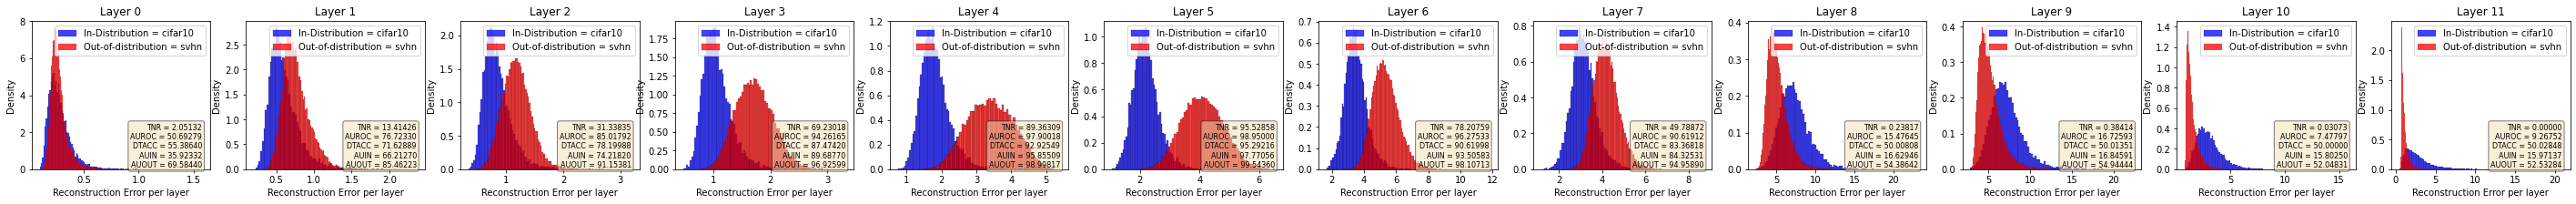

In [37]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results[layer])
    print('')
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind[layer]),np.max(-ood[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)



{'TMP': {'TNR': 0.03207590657652115, 'AUROC': 0.5701758182237247, 'DTACC': 0.5780147510755992, 'AUIN': 0.3844598184306045, 'AUOUT': 0.7354725465182632}}
{'TMP': {'TNR': 0.29575138291333747, 'AUROC': 0.8610532344806392, 'DTACC': 0.7952387523048555, 'AUIN': 0.7816783750450846, 'AUOUT': 0.9157058320848985}}
{'TMP': {'TNR': 0.45978027043638603, 'AUROC': 0.8933431891518131, 'DTACC': 0.8230025814382299, 'AUIN': 0.8116027064324093, 'AUOUT': 0.9378654560670481}}
{'TMP': {'TNR': 0.8071988322065151, 'AUROC': 0.9606510640749845, 'DTACC': 0.901140688383528, 'AUIN': 0.9210057511092617, 'AUOUT': 0.9806337904482051}}
{'TMP': {'TNR': 0.9213275968039336, 'AUROC': 0.9821603948985862, 'DTACC': 0.937139950829748, 'AUIN': 0.9579066021803656, 'AUOUT': 0.992522207516806}}
{'TMP': {'TNR': 0.9298171481253842, 'AUROC': 0.9825930623847572, 'DTACC': 0.9400427166564229, 'AUIN': 0.9537013854077645, 'AUOUT': 0.9933072163621871}}
{'TMP': {'TNR': 0.5470958819913951, 'AUROC': 0.9071961393669331, 'DTACC': 0.830156822372

KeyboardInterrupt: 

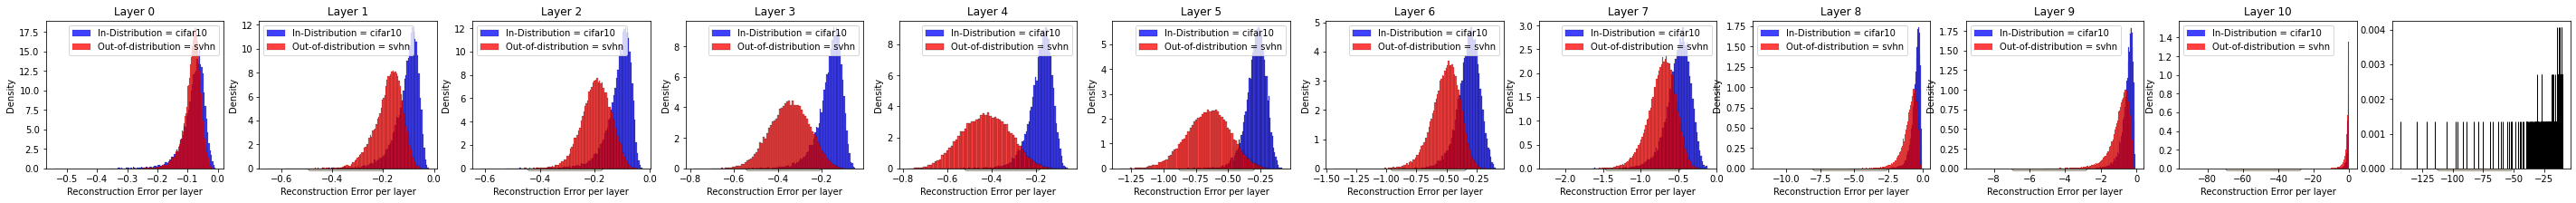

In [39]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind_revised[layer],ood_revised[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=ind_revised[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=ood_revised[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind_revised[layer]),np.max(-ood_revised[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)




In [18]:
# ind_scaled_mul = ind_revised[0]*ind_revised[1]*ind_revised[2]*ind_revised[3]*ind_revised[4]*ind_revised[5]*ind_revised[6]*ind_revised[7]*ind_revised[8]*ind_revised[9]*ind_revised[10]*ind_revised[11]
# ood_scaled_mul = []
# for j in range(len(ood_dataset)):
#     ood_scaled_mul.append(ood_revised[0][j]*ood_revised[1][j]*ood_revised[2][j]*ood_revised[3][j]*ood_revised[4][j]*ood_revised[5][j]*ood_revised[6][j]*ood_revised[7][j]*ood_revised[8][j]*ood_revised[9][j]*ood_revised[10][j]*ood_revised[11][j])

In [19]:
# ood_index= 2
# print(ood_dataset[ood_index])
# results_max,_,_ = callog.metric(ind_scaled_mul,ood_scaled_mul[ood_index])
# print(results_max)
# sns.histplot(data=-ind_scaled_mul,color='blue',stat='density')
# sns.histplot(data=-ood_scaled_mul[ood_index],color='red',stat='density')
# plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# plt.title('Multipled Anomaly')
# plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_mul),np.max(-ood_scaled_mul[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [20]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train_revised[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind_revised[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood_revised[i][j].reshape(-1,1)).reshape(-1))

In [21]:
ind_scaled_max=np.max(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.max(ood_scaled[j],0))

svhn
{'TMP': {'TNR': 0.7379763368162262, 'AUROC': 0.9595066956054086, 'DTACC': 0.9111639827904119, 'AUIN': 0.9416562476240662, 'AUOUT': 0.9760752132887506}}
73.80 / 95.95 / 91.12


Text(4.047381315725234, 0, 'TNR = 73.79763\nAUROC = 95.95067\nDTACC = 91.11640\nAUIN = 94.16562\nAUOUT = 97.60752')

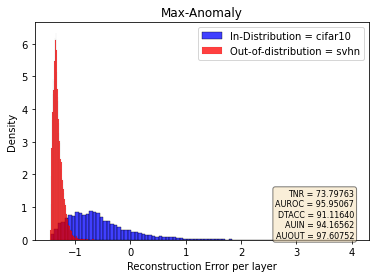

In [22]:
ood_index= 0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_scaled_max,-ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

rst = results_max['TMP']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)